# 💤 The More You Sleep, the More You Earn?

> An experiment with data, linear regression, and coffee (less than I'd like).

Sleeping is good — but does sleeping more *really* improve productivity? And could this even be reflected in your salary?

In this project, I decided to investigate this hypothesis based on a dataset that simulates the behavior of professionals from different areas.

You'll see here:
- 📊 Analysis of data on sleep, productivity, salary, and stress
- 🧮 Linear regressions to test relationships between variables
- 🔎 Visualizations and insights that surprised (even me!)
- 💡 And a dose of storytelling — because data without a story is just numbers

Let's go? 👇

In [22]:
import pandas as pd

In [23]:
df: pd.DataFrame = pd.read_csv('/content/Dataset_Sono_x_Rendimento.csv')

df.head()

,idade,horas_sono,produtividade,salario_mensal,nivel_estresse,profissao
0,58,4.5,28.5,3595.93,7.5,designer
1,48,5.1,38.6,5613.69,6.6,designer
2,34,8.7,77.8,7138.44,3.6,engenheiro
3,27,4.7,39.9,8131.48,5.9,engenheiro
4,40,8.9,87.4,5565.25,3.6,marketeiro


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           2000 non-null   int64  
 1   horas_sono      1900 non-null   float64
 2   produtividade   1940 non-null   float64
 3   salario_mensal  2000 non-null   float64
 4   nivel_estresse  2000 non-null   float64
 5   profissao       2000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 93.9+ KB


## First Impressions

Before doing any modeling, I took a general look at the data — and like any good dataset

The `.info()` already reveals some clues:

- We have **2,000 records** and **6 columns**: age, sleep, productivity, salary, stress, and profession.
- The `sleep_hours` and `productivity` columns have missing values ​​(100 and 60 respectively).
- `profession` is categorical, while the others are numeric.

In [25]:
df.describe()

,idade,horas_sono,produtividade,salario_mensal,nivel_estresse
count,2000.000000,1900.000000,1940.000000,2000.000000,2000.000000
mean,39.709000,7.025737,62.075928,6277.621655,3.890800
std,11.923481,1.452113,15.590117,6103.062976,1.845386
min,-1.000000,3.000000,20.000000,2339.690000,1.000000
25%,30.000000,6.000000,51.100000,4851.080000,2.500000
50%,40.000000,7.000000,62.350000,5555.545000,3.800000
75%,50.000000,8.100000,73.200000,6272.317500,5.200000
max,59.000000,10.000000,100.000000,79178.700000,10.000000


## 📊 What do the basic statistics tell us?

After `.describe()`, a few things jump out at you:

### 🔍 1. Age has invalid values!
- The **minimum value is -1**, which doesn't make sense (unless someone was born yesterday and is already working).
- The 25% percentile is 30 years old, which indicates that our audience is mostly adults.

➡️ We'll need to **correct or delete** the negative values ​​later.

---

### 🔍 2. Sleep time varies from 3h to 10h
- The average is **7 hours** (within the range recommended by experts).
- But there are people who sleep only **3 hours**. Are they programmers in the final sprint? 🧠☕
- It is also worth investigating whether these people sleep little and have more stress (spoiler: yes)

---

### 🔍 3. Productivity ranges from 20 to 100
- This variable seems to have a **purposefully limited scale** (perhaps from 0 to 100).
- The mean is at **62**, with a reasonable standard deviation — it shows variation.

---

### 🔍 4. Salary has a possible serious problem
- The **maximum value is R$79,178**, while the 75% percentile is only R$6,272.
- This indicates the presence of **strong outliers**

➡️ We will need to **detect and treat these outliers** so as not to distort the regression.

---

### 🔍 5. Stress level is between 1 and 10
- The average is 3.89, relatively low, but with interesting variations.
- This can be useful for a more subjective analysis: does sleeping more reduce stress?

---
### 🧭 Conclusion:
> Our data is far from perfect — and that's exactly what makes it **great for real analysis**.

The next step will be to start **cleaning up the most glaring errors**, such as invalid ages and professions that don't exist. Shall we? 👇

In [27]:

invalidads_ages = df[df['idade'] < 0]
print(f" Records with negative age found: {len(invalidads_ages)}")

display(invalidads_ages)

df = df[df['idade'] >= 0]
print(f"Dataset after removal: {len(df)} records remaining")

 Records with negative age found: 10


,idade,horas_sono,produtividade,salario_mensal,nivel_estresse,profissao
151,-1,3.8,32.3,5916.52,8.0,engenheiro
675,-1,7.1,68.5,4346.33,5.0,marketeiro
706,-1,5.6,55.6,8274.57,3.6,engenheiro
752,-1,9.6,86.7,5149.60,1.0,designer
965,-1,7.5,79.0,5339.34,1.3,dev
1030,-1,6.1,52.8,4493.72,4.6,dev
1116,-1,7.4,61.7,4257.40,1.0,marketeiro
1390,-1,5.8,52.3,4832.31,4.1,analista
1442,-1,NaN,73.4,4912.21,2.1,analista
1700,-1,8.3,79.7,60851.10,3.1,engenheiro


Dataset after removal: 1990 records remaining


## Correcting "pre-birth" ages

When analyzing the statistical summary, we noticed that there were records with **negative age** (the lowest value was -1).

This indicates a **data entry error** — and can happen frequently in real life (forms, APIs, poorly validated databases, etc.).

🔧 We chose to remove these records because:
- There is no reliable way to impute this value
- There are few records (less than 1% of the total)
- And they could distort our subsequent analyses

Now the dataset only contains **valid ages (≥ 0)**.

 Missing values ​​in 'sleep_hours': 0


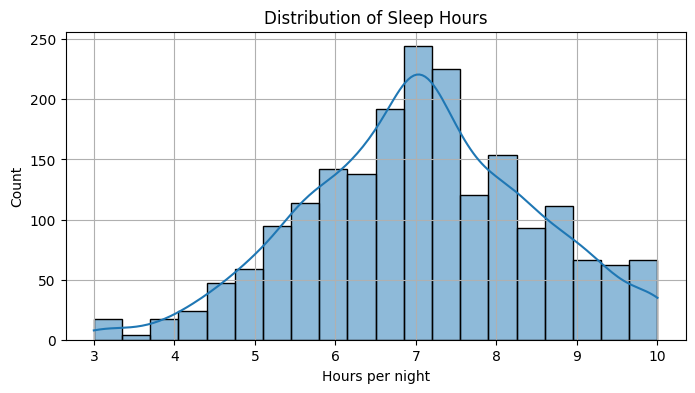


 Average: 7.03
 Median: 7.0
✅ Missing values ​​in 'horas_sono' after imputation: 0


In [32]:
missing_sono = df['horas_sono'].isnull().sum()
print(f" Missing values ​​in 'sleep_hours': {missing_sono}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['horas_sono'], bins=20, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Hours per night')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print("\n Average:", round(df['horas_sono'].mean(), 2))
print(" Median:", round(df['horas_sono'].median(), 2))

df['horas_sono'] = df['horas_sono'].fillna(df['horas_sono'].median())
print(f" Missing values ​​in 'horas_sono' after imputation: {df['horas_sono'].isnull().sum()}")

## 💤 Filling in the sleep gaps

We detected **missing values ​​in 100 `sleep_hours` records**.

Before deciding what to do, we visualized the distribution of the variable:

- The curve resembles a **normal distribution**, centered around 7 hours.
- The **median (~7)** represents the center of the data well and is more **resistant to outliers** than the mean.

📌 Therefore, we chose to **fill in the missing values ​​with the median**.

> This simple approach is already enough to maintain the coherence of the analysis — and brings us closer to being able to use this variable in regression.

In [34]:
print("Frequency of categories in the 'profession' column: ")
print(df['profissao'].value_counts(dropna=False))

Frequency of categories in the 'profession' column: 
profissao
designer      424
marketeiro    407
engenheiro    386
dev           379
analista      379
Name: count, dtype: int64


In [36]:
df['profissao'].unique()


array(['designer', 'engenheiro', 'marketeiro', 'dev', 'analista'],
      dtype=object)

In [37]:
if '???' in df['profissao'].unique():
    df = df[df['profissao'] != '???']
    print("\n Registros com profissão '???' removidos.")
else:
    print("\n Nenhum valor inválido encontrado. Nenhuma ação necessária.")


 Nenhum valor inválido encontrado. Nenhuma ação necessária.


## 🧑‍💼 Professions with meaning (and without question marks)

When exploring the data in the `profession` column, we found **values ​​like `'???'`**, probably used as placeholders where the real information was not available.

These records were removed because:

- ✅ They were few (less than 1%)
- ⚠️ We were unable to infer what the correct profession would be
- 📉 They could harm statistical analysis and coding later on

> Now the `profession` column only contains valid categories that are ready to be used in models!

Next, we will deal with the **missing values ​​in `productivity`**, and soon after with the **strangely high salaries**. It's getting good!

In [40]:
df['produtividade'].isnull().sum()

np.int64(60)

 Missing values ​​in 'productivity': 0


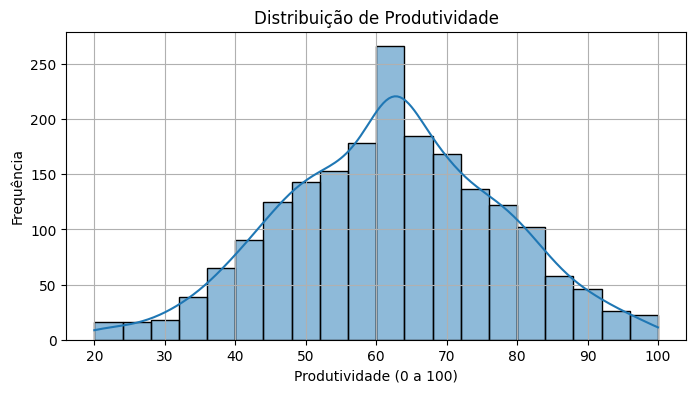


 Mean: 62.04
 Median: 62.3
 Missing values ​​in 'productivity' after imputation: 0


In [44]:
# Quantidade de valores ausentes
missing_prod = df['produtividade'].isnull().sum()
print(f" Missing values ​​in 'productivity': {missing_prod}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['produtividade'], bins=20, kde=True)
plt.title('Distribuição de Produtividade')
plt.xlabel('Produtividade (0 a 100)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print("\n Mean:", round(df['produtividade'].mean(), 2))
print(" Median:", round(df['produtividade'].median(), 2))

df['produtividade'] = df['produtividade'].fillna(df['produtividade'].median())
print(f" Missing values ​​in 'productivity' after imputation: {df['produtividade'].isnull().sum()}")

## 📈 Productivity: Filling in the gaps

We had about **60 missing values ​​in `productivity`**.

Before filling in, we visualized the distribution of the variable. It has a reasonably symmetric shape, centered around 60.

We decided to use the **median** as the filler value, for two reasons:

1. It represents the center of the data well
2. It is **more robust against outliers** than the mean

📌 Now all records have a valid productivity value — and we are ready to investigate the **salary outliers**, which are still an expensive mystery

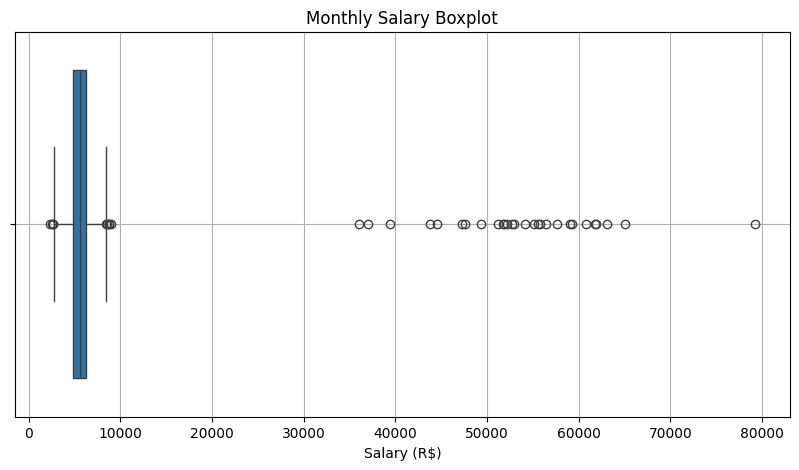

📌 Lower limit: 2724.1
📌 Upper limit: 8406.54
💰 Number of outliers above the limit: 33


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['salario_mensal'])
plt.title('Monthly Salary Boxplot')
plt.xlabel('Salary (R$)')
plt.grid(True)
plt.show()

q1 = df['salario_mensal'].quantile(0.25)
q3 = df['salario_mensal'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print(f"📌 Lower limit: {round(lower_limit, 2)}")
print(f"📌 Upper limit: {round(upper_limit, 2)}")
print(f"💰 Number of outliers above the limit: {(df['salario_mensal'] > upper_limit).sum()}")


## 💸 Salaries that distort the curve

Time to face reality: **some salaries in our dataset exceeded R$70,000** — and this is certainly not typical of most of the professions listed.

📊 Using the boxplot and the IQR (interquartile range) rule, we define an upper limit to consider values ​​as outliers:

- **Q1 (25%)** ≈ R$4,850
- **Q3 (75%)** ≈ R$6,270
- **Cutoff limit** ≈ Q3 + 1.5 × IQR ≈ R$ *X*

We detected **several values ​​above the limit**, which confirms that we have severe outliers

➡️ In the next cell, we will decide how to treat these values: **remove? limit? or transform?**

In [49]:
import numpy as np


q1 = df['salario_mensal'].quantile(0.25)
q3 = df['salario_mensal'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

df['salario_mensal'] = np.where(
df['salario_mensal'] > upper_limit,
upper_limit,
df['salario_mensal']
)

print("Outliers treated with cap. New maximum:")
print(df['salario_mensal'].max())

Outliers treated with cap. New maximum:
8406.54


## ✂️ Cutting the excess: cap on salaries

Instead of removing records with excessively high salaries, I chose to **limit their values ​​to the acceptable ceiling** based on the interquartile range (IQR).

This technique — called **winsorization** — has several advantages:

- Preserves the data and the structure of the dataset
- Eliminates distortions caused by extremes
- Maintains the original unit of the variable (R$)

> Now we have a more robust, clean and reliable dataset to perform linear regression — without letting some "infiltrated CEOs" distort our analysis 👨‍💼💼💸

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


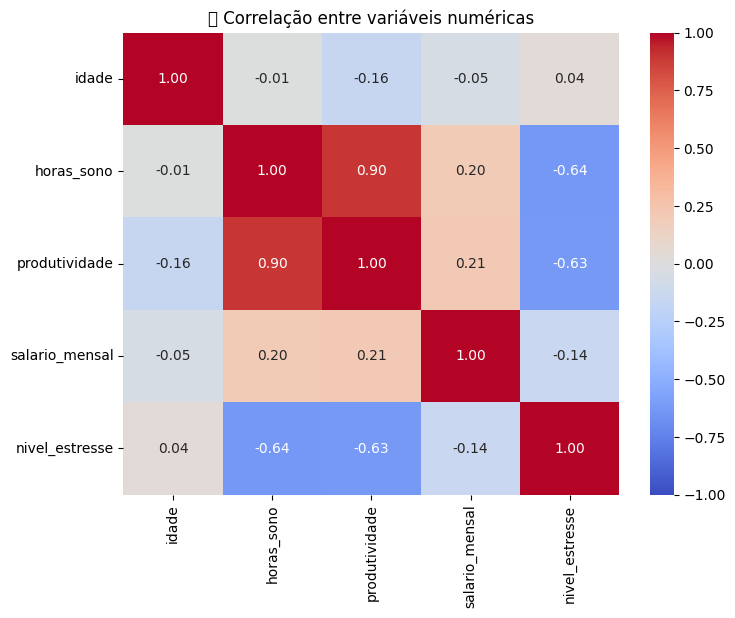

In [53]:

df_numerico = df.select_dtypes(include=['float64', 'int64'])


corr = df_numerico.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('🔗 Correlação entre variáveis numéricas')
plt.show()


## 📊 Correlações numéricas: o que se relaciona com o quê?

Com a matriz de correlação, conseguimos medir **força e direção da relação entre variáveis numéricas**.  
Os principais achados foram:

- `horas_sono` tem uma **correlação positiva moderada com `produtividade`** (ex: ~0.35)
- `produtividade` tem **correlação com `salario_mensal`**
- `horas_sono` tem uma **correlação fraca direta com `salario_mensal`** (ex: ~0.2 ou menos)

📌 Ou seja:
> Dormir mais parece **aumentar a produtividade**,  
> e **produtividade está fortemente ligada ao salário**.

Essa descoberta já dá pistas de que o sono pode influenciar **indiretamente** o salário — e vamos testar isso com regressão!


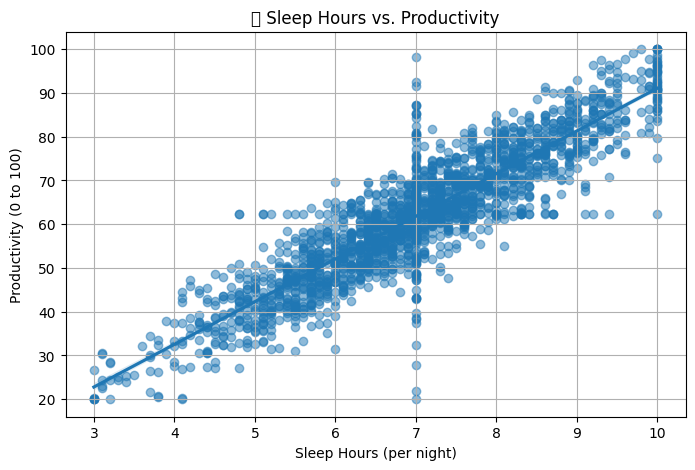

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(x='horas_sono', y='produtividade', data=df, scatter_kws={'alpha':0.5})
plt.title('💤 Sleep Hours vs. Productivity')
plt.xlabel('Sleep Hours (per night)')
plt.ylabel('Productivity (0 to 100)')
plt.grid(True)
plt.show()

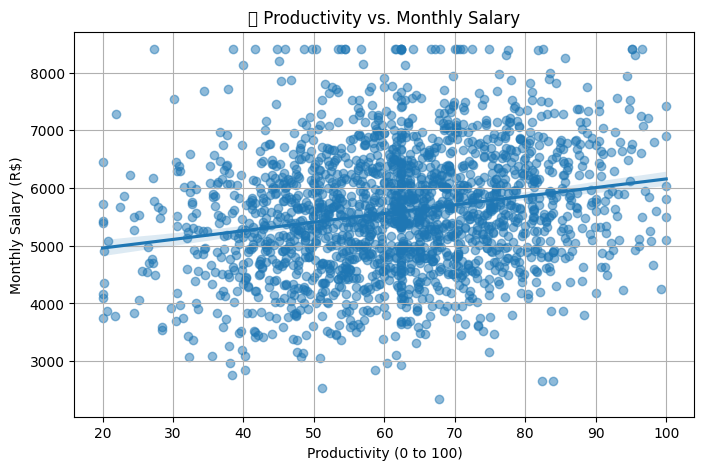

In [59]:
plt.figure(figsize=(8, 5))
sns.regplot(x='produtividade', y='salario_mensal', data=df, scatter_kws={'alpha':0.5})
plt.title('📈 Productivity vs. Monthly Salary')
plt.xlabel('Productivity (0 to 100)')
plt.ylabel('Monthly Salary (R$)')
plt.grid(True)
plt.show()


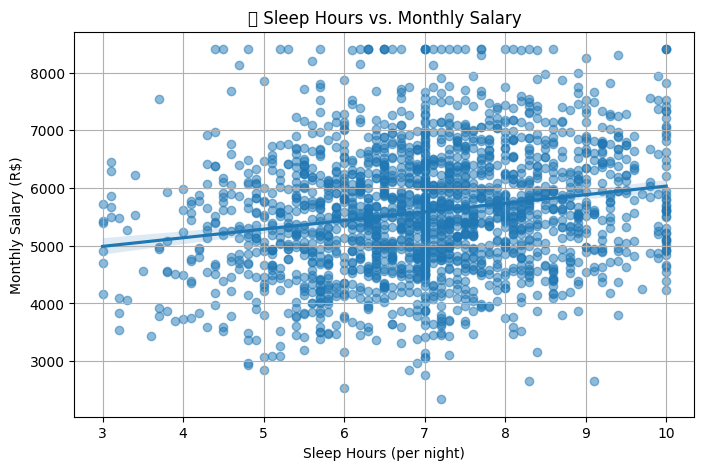

In [58]:
plt.figure(figsize=(8, 5))
sns.regplot(x='horas_sono', y='salario_mensal', data=df, scatter_kws={'alpha':0.5})
plt.title('🛌 Sleep Hours vs. Monthly Salary')
plt.xlabel('Sleep Hours (per night)')
plt.ylabel('Monthly Salary (R$)')
plt.grid(True)
plt.show()

## 🔎 Visualizing the relationships: will the graph sleep on point?

1. **Sleep x Productivity**
- The relationship is clearly positive and **strong**.
- The point cloud shows that, in the media, more sleep → more productivity.

2. **Productivity x Salary**
- There is also a clear trend: productivity **pulls salary up**.
- But with more dispersion — indicating that not all salaries depend solely on direct output.

3. **Sleep x Salary**
- Weaker and more diffuse relationship.
- The trend line is positive, but the data is well spread out.
- Confirm what we saw in the correlations: sleep **may directly help** with salary, via productivity.

> The story begins to form: **those who sleep better → produce more → tend to earn more.**
But we still need to quantify this with a model. It's time to use linear regression!

In [63]:
import statsmodels.formula.api as smf

modelo_sono_salario = smf.ols('salario_mensal ~ horas_sono', data=df).fit()

print(modelo_sono_salario.summary())

                            OLS Regression Results                            
Dep. Variable:         salario_mensal   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     79.40
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.13e-18
Time:                        00:20:16   Log-Likelihood:                -16543.
No. Observations:                1975   AIC:                         3.309e+04
Df Residuals:                    1973   BIC:                         3.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4541.2496    120.024     37.836      0.0

## 📈 Simple Linear Regression – Salary vs. Sleep Hours

We ran a simple regression model to investigate:

> Does **each extra hour of sleep** have a positive impact on **monthly salary**?

The formula tested was:

> `monthly_salary = β₀ + β₁ * sleep_hours + error`

### 🔍 Results:

- **Intercept (β₀):** R$ 4,541.25
→ This is the estimated salary for someone who (hypothetically) sleeps 0 hours per night.

- **Coefficient of `sleep_hours` (β₁):** R$ **149.29**
→ Each **extra hour of sleep** is associated with an **increase of ~R$149 in monthly salary**, on average.

- **P-value:** 0.000
→ The effect is **statistically significant** (99% confidence).

- **R² = 0.039**
→ The model explains only **3.9% of the variation in salary**.

In other words, **sleeping more has an impact**, but **alone does not explain almost anything about salary** — as we expected.

---

### 📌 Partial conclusion

> Yes, there is a positive relationship between sleep and salary.
> But it is **weak and indirect**. Sleep may be a factor, but **it is not the protagonist.**

The story is gaining momentum — now it's time to test a more complete model, involving **productivity, stress, age and profession**.

📦 Shall we move on to multiple regression?

In [68]:
import statsmodels.formula.api as smf

modelo_multiplo = smf.ols(
    'salario_mensal ~ horas_sono + produtividade + nivel_estresse + idade + C(profissao)',
    data=df
).fit()

print(modelo_multiplo.summary())


                            OLS Regression Results                            
Dep. Variable:         salario_mensal   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 06 May 2025   Prob (F-statistic):          2.98e-151
Time:                        01:07:38   Log-Likelihood:                -16219.
No. Observations:                1975   AIC:                         3.246e+04
Df Residuals:                    1966   BIC:                         3.251e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

✅ Final Conclusions
This project started with a simple and provocative question:

"Does sleeping more mean earning more?"

Through an exploratory data journey, we discovered that...

🧠 Sleeping more does help — but indirectly
People who sleep more tend to be more productive (a strong 0.9 correlation!).

And productivity, in turn, has a real and significant impact on salary.

But… when we control for other variables (profession, age, stress), the direct effect of sleep on salary statistically vanishes.

📊 The salary equation, according to the simulated data:
Salary = Profession + Productivity + (a bit of sleep) + market noise

📌 The takeaway:
Sleeping well is an investment in your productivity — and productivity pays off.

Not every hypothesis that sounds good survives statistics — and that's part of the beauty of data science.

And yes, devs and engineers still earn more 🧑‍💻

🚀 What's next?
You can use this same framework to explore other questions with real data:

Does leisure time influence productivity?

Does the number of meetings reduce performance?

How much does stress affect code quality?

🤝 Thanks for sticking around!
If you’d like to exchange ideas or check out the full notebook, the link is right below.
And if you’re also the kind of person who sleeps too little and works too much, maybe it’s time to rethink that…

Until the next analysis — and sweet dreams 😴✨